In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
X_train = np.load("../SpeechER/data_split/X_train.npy")
X_test = np.load("../SpeechER/data_split/X_test.npy")
y_train = np.load("../SpeechER/data_split/y_train.npy")
y_test = np.load("../SpeechER/data_split/y_test.npy")

In [5]:
model = Sequential()
model.add(Conv1D(filters=32*8, kernel_size=5, activation="relu", padding="same", input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=32*8, kernel_size=5, activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(Conv1D(filters=32*4, kernel_size=5, activation="relu", padding="same"))
model.add(Conv1D(filters=32*4, kernel_size=5, activation="relu", padding="same"))
model.add(Conv1D(filters=32*4, kernel_size=5, activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(Dropout(0.2))
model.add(Conv1D(filters=32*2, kernel_size=5, activation="relu", padding="same"))
model.add(Conv1D(filters=32*2, kernel_size=5, activation="relu", padding="same"))
model.add(Conv1D(filters=32*2, kernel_size=5, activation="relu", padding="same"))
model.add(Conv1D(filters=32*2, kernel_size=5, activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(Dropout(0.3))
model.add(Conv1D(filters=32, kernel_size=5, activation="relu", padding="same"))
model.add(Conv1D(filters=32, kernel_size=5, activation="relu", padding="same"))
model.add(Conv1D(filters=32, kernel_size=5, activation="relu", padding="same"))
model.add(Conv1D(filters=32, kernel_size=5, activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()
model.save("../SpeechER/models/model2.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 162, 256)          1536      
                                                                 
 conv1d_14 (Conv1D)          (None, 162, 256)          327936    
                                                                 
 batch_normalization_4 (Batc  (None, 162, 256)         1024      
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 33, 256)          0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, 33, 128)           163968    
                                                                 
 conv1d_16 (Conv1D)          (None, 33, 128)          

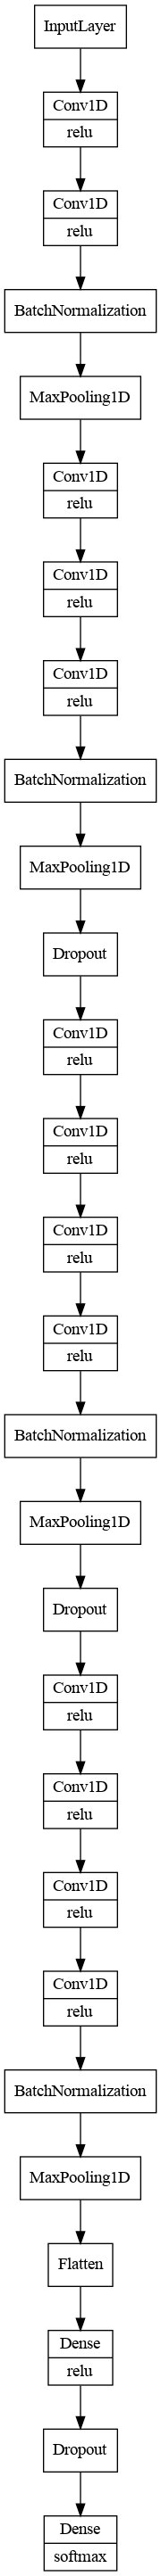

In [6]:
plot_model(model, "../SpeechER/figs/m2arc.png", show_layer_names=False, show_layer_activations=True)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("../SpeechER/checkpoints/model2_best", save_best_only=True)
stop_early = EarlyStopping(monitor='val_loss', patience=20)

In [9]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[stop_early, checkpoint])

Epoch 1/100


2023-06-04 09:31:07.259518: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8901
2023-06-04 09:31:07.872076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


856/856 [==============================] - ETA: 0s - loss: 1.7418 - accuracy: 0.2961

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 20s 16ms/step - loss: 1.7418 - accuracy: 0.2961 - val_loss: 1.7230 - val_accuracy: 0.3224
Epoch 2/100
856/856 [==============================] - ETA: 0s - loss: 1.5121 - accuracy: 0.3998

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 1.5121 - accuracy: 0.3998 - val_loss: 1.3958 - val_accuracy: 0.4495
Epoch 3/100
856/856 [==============================] - 11s 13ms/step - loss: 1.4233 - accuracy: 0.4376 - val_loss: 1.4463 - val_accuracy: 0.4175
Epoch 4/100
856/856 [==============================] - 11s 13ms/step - loss: 1.3696 - accuracy: 0.4607 - val_loss: 1.4902 - val_accuracy: 0.4418
Epoch 5/100
852/856 [============================>.] - ETA: 0s - loss: 1.3115 - accuracy: 0.4791

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 1.3110 - accuracy: 0.4794 - val_loss: 1.2518 - val_accuracy: 0.5062
Epoch 6/100
856/856 [==============================] - 11s 12ms/step - loss: 1.2749 - accuracy: 0.4986 - val_loss: 1.2589 - val_accuracy: 0.4905
Epoch 7/100
852/856 [============================>.] - ETA: 0s - loss: 1.2231 - accuracy: 0.5204

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 1.2228 - accuracy: 0.5207 - val_loss: 1.2194 - val_accuracy: 0.5058
Epoch 8/100
852/856 [============================>.] - ETA: 0s - loss: 1.1808 - accuracy: 0.5338

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 1.1799 - accuracy: 0.5342 - val_loss: 1.1461 - val_accuracy: 0.5535
Epoch 9/100
855/856 [============================>.] - ETA: 0s - loss: 1.1511 - accuracy: 0.5495

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 1.1510 - accuracy: 0.5495 - val_loss: 1.1136 - val_accuracy: 0.5542
Epoch 10/100
855/856 [============================>.] - ETA: 0s - loss: 1.1185 - accuracy: 0.5630

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.1185 - accuracy: 0.5630 - val_loss: 1.1113 - val_accuracy: 0.5661
Epoch 11/100
856/856 [==============================] - 11s 12ms/step - loss: 1.0874 - accuracy: 0.5738 - val_loss: 1.1463 - val_accuracy: 0.5376
Epoch 12/100
856/856 [==============================] - 10s 12ms/step - loss: 1.0565 - accuracy: 0.5852 - val_loss: 1.1177 - val_accuracy: 0.5671
Epoch 13/100
855/856 [============================>.] - ETA: 0s - loss: 1.0346 - accuracy: 0.5990

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 1.0345 - accuracy: 0.5991 - val_loss: 1.0653 - val_accuracy: 0.5836
Epoch 14/100
853/856 [============================>.] - ETA: 0s - loss: 1.0099 - accuracy: 0.6049

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 1.0101 - accuracy: 0.6047 - val_loss: 1.0628 - val_accuracy: 0.5934
Epoch 15/100
855/856 [============================>.] - ETA: 0s - loss: 0.9782 - accuracy: 0.6220

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 0.9781 - accuracy: 0.6221 - val_loss: 1.0574 - val_accuracy: 0.5815
Epoch 16/100
855/856 [============================>.] - ETA: 0s - loss: 0.9661 - accuracy: 0.6280

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 0.9660 - accuracy: 0.6281 - val_loss: 1.0567 - val_accuracy: 0.5935
Epoch 17/100
853/856 [============================>.] - ETA: 0s - loss: 0.9274 - accuracy: 0.6424

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 0.9275 - accuracy: 0.6425 - val_loss: 1.0489 - val_accuracy: 0.6048
Epoch 18/100
856/856 [==============================] - 11s 13ms/step - loss: 0.8990 - accuracy: 0.6573 - val_loss: 1.1024 - val_accuracy: 0.5903
Epoch 19/100
855/856 [============================>.] - ETA: 0s - loss: 0.8710 - accuracy: 0.6720

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 0.8709 - accuracy: 0.6721 - val_loss: 1.0382 - val_accuracy: 0.6069
Epoch 20/100
856/856 [==============================] - 11s 13ms/step - loss: 0.8390 - accuracy: 0.6809 - val_loss: 1.1939 - val_accuracy: 0.5753
Epoch 21/100
856/856 [==============================] - 11s 13ms/step - loss: 0.8183 - accuracy: 0.6894 - val_loss: 1.0545 - val_accuracy: 0.6111
Epoch 22/100
856/856 [==============================] - 11s 13ms/step - loss: 0.7965 - accuracy: 0.7037 - val_loss: 1.1042 - val_accuracy: 0.6037
Epoch 23/100
856/856 [==============================] - 11s 13ms/step - loss: 0.7663 - accuracy: 0.7134 - val_loss: 1.0704 - val_accuracy: 0.6083
Epoch 24/100
856/856 [==============================] - 11s 13ms/step - loss: 0.7410 - accuracy: 0.7244 - val_loss: 1.0775 - val_accuracy: 0.6208
Epoch 25/100
856/856 [==============================] - 11s 13ms/step - loss: 0.7174 - accuracy: 0.7355 - val_loss: 1.1591 - val_accuracy

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model2_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 0.6889 - accuracy: 0.7456 - val_loss: 1.0299 - val_accuracy: 0.6266
Epoch 27/100
856/856 [==============================] - 11s 13ms/step - loss: 0.6593 - accuracy: 0.7584 - val_loss: 1.1375 - val_accuracy: 0.6246
Epoch 28/100
856/856 [==============================] - 10s 12ms/step - loss: 0.6434 - accuracy: 0.7650 - val_loss: 1.0946 - val_accuracy: 0.6396
Epoch 29/100
856/856 [==============================] - 10s 12ms/step - loss: 0.6169 - accuracy: 0.7728 - val_loss: 1.1926 - val_accuracy: 0.6160
Epoch 30/100
856/856 [==============================] - 11s 12ms/step - loss: 0.5917 - accuracy: 0.7839 - val_loss: 1.1577 - val_accuracy: 0.6309
Epoch 31/100
856/856 [==============================] - 11s 12ms/step - loss: 0.5705 - accuracy: 0.7903 - val_loss: 1.1428 - val_accuracy: 0.6314
Epoch 32/100
856/856 [==============================] - 10s 12ms/step - loss: 0.5650 - accuracy: 0.7970 - val_loss: 1.1233 - val_accuracy

In [10]:
eval = model.evaluate(X_test, y_test)

286/286 [==============================] - 1s 4ms/step - loss: 1.4095 - accuracy: 0.6414


In [11]:
encoder = OneHotEncoder()
Y = np.load("../SpeechER/feature_labels.npy")
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [12]:
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)


df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

286/286 [==============================] - 1s 3ms/step


,Predicted Labels,Actual Labels
0,happy,disgust
1,sad,sad
2,disgust,happy
3,happy,disgust
4,happy,happy
5,surprise,calm
6,happy,happy
7,neutral,neutral
8,surprise,surprise
9,sad,sad


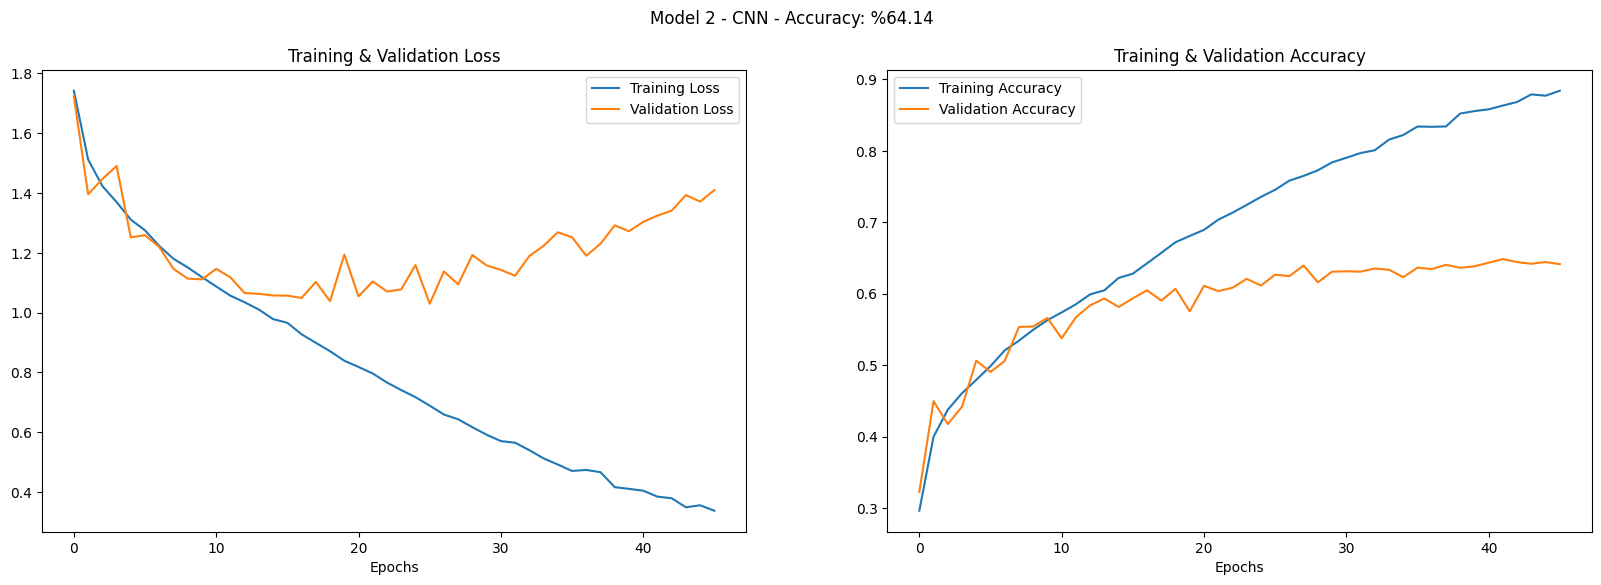

In [13]:
epochs = [i for i in range(stop_early.stopped_epoch + 1)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
fig.suptitle(f"Model 2 - CNN - Accuracy: %{round(eval[1]*100,2)}")
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.savefig("../SpeechER/figs/model2.png")

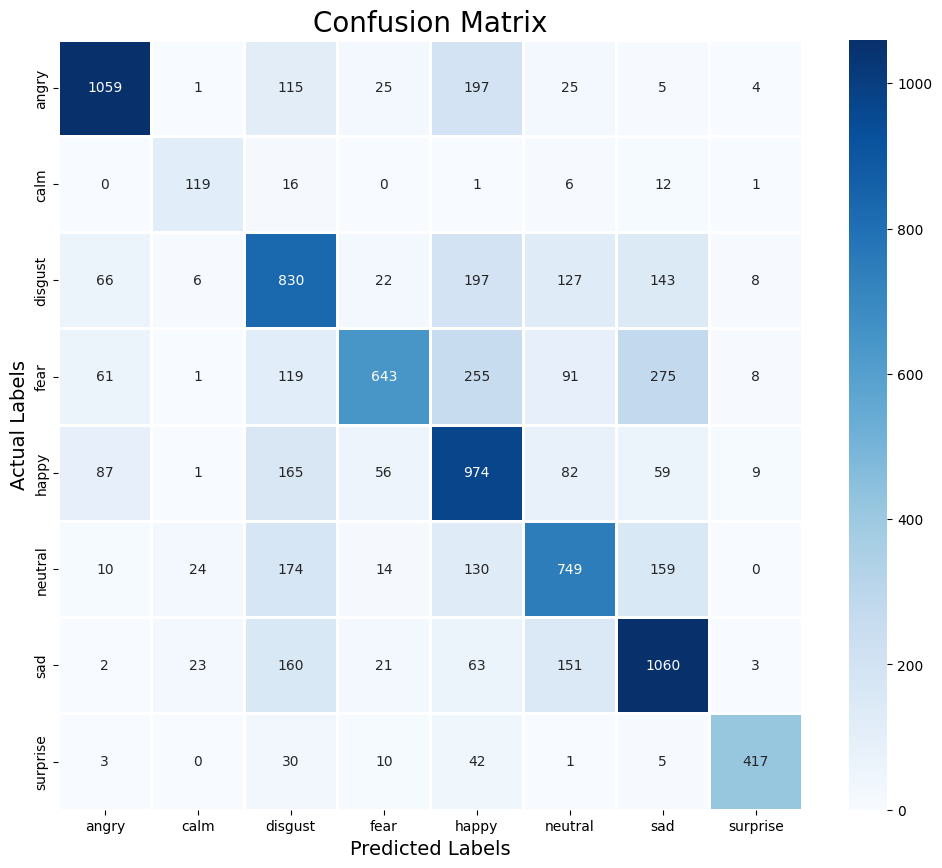

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.82      0.74      0.78      1431
        calm       0.68      0.77      0.72       155
     disgust       0.52      0.59      0.55      1399
        fear       0.81      0.44      0.57      1453
       happy       0.52      0.68      0.59      1433
     neutral       0.61      0.59      0.60      1260
         sad       0.62      0.71      0.66      1483
    surprise       0.93      0.82      0.87       508

    accuracy                           0.64      9122
   macro avg       0.69      0.67      0.67      9122
weighted avg       0.67      0.64      0.64      9122

